# Lab 04. 스무딩 실습
---

- 스무딩의 대표적인 방법인 이동 평균과 지수 평활법을 바탕으로 실습을 진행해본다.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

- 시계열 데이터와 데이터 프레임을 생성한 후 내용물을 확인해본다.

In [2]:
dates =  pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성 

data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01  4.817590
1  2023-01-02  8.558979
2  2023-01-03 -3.849672
3  2023-01-04 -7.198124
4  2023-01-05  2.078310
..        ...       ...
95 2023-04-06  9.163103
96 2023-04-07  4.151135
97 2023-04-08 -9.790712
98 2023-04-09  8.467805
99 2023-04-10  2.834277

[100 rows x 2 columns]


- 원본 시계열 데이터를 시각화 해본다. 

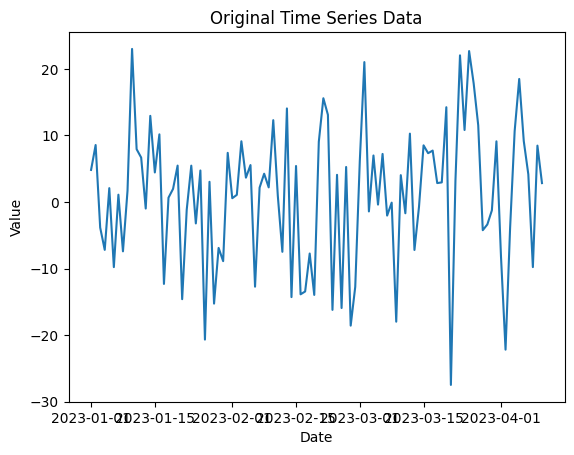

In [3]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')

plt.show()

- 이동 평균을 이용하여 스무딩을 해보자. 이동 평균을 계산하고 시각화를 해본다. 

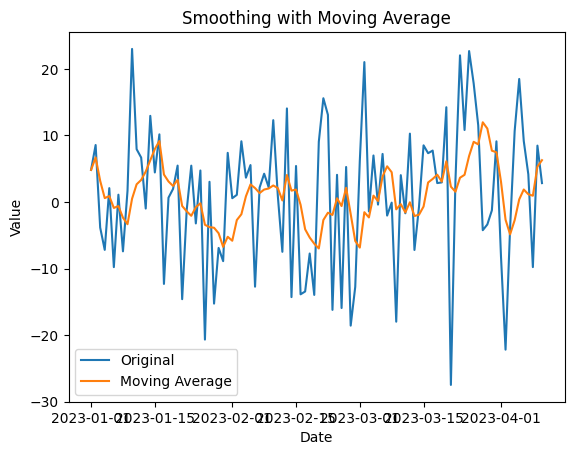

In [4]:
# 이동 평균 윈도우 크기 설정 
window_size = 7 

# 이동 평균 계산 
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()

plt.show()

- 지수 평활법을 이용하여 스무딩을 해보자. 지수 평활법으로 계산해보고 시각화를 해본다. 

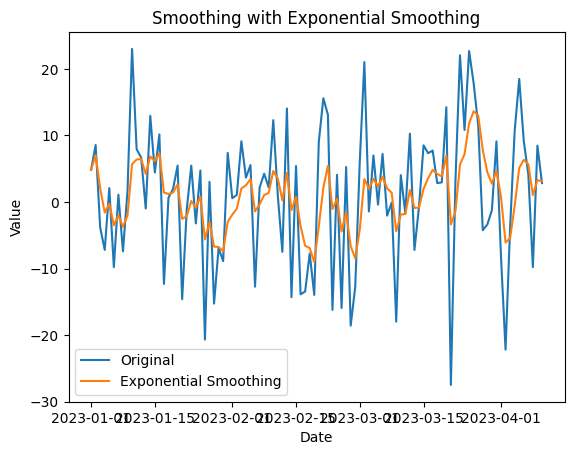

In [5]:
alpha = 0.3 

# 지수평활법 계산 
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()

plt.show()